<h1><b><center>Percentile Method</center></b></h1>

<h3>How percentile works?</h3>

This technique works by setting a particular threshold value, which is decided based on our problem statement.  
While we remove the outliers using capping (replacing values with different values), then that particular method is known as <b>Winsorization</b>.  
Here, we always maintain symmetry on both sides, meaning if we remove 1% from the right, the left will also drop by 1%.

<h5>Let's understand this practically.</h5>

Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.shape

(13200, 7)

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


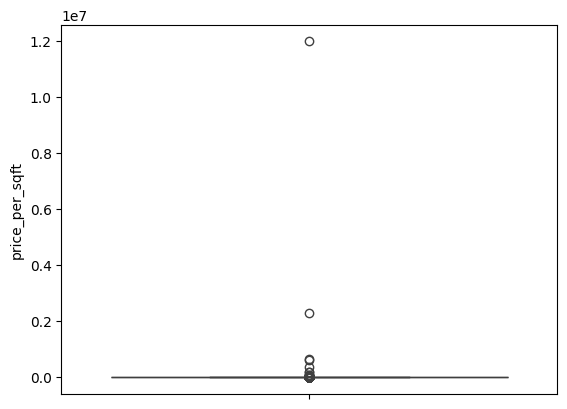

In [4]:
sns.boxplot(data=df.price_per_sqft)
plt.show()

In [5]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001,0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [7]:
df[(df.price_per_sqft < min_threshold) | (df.price_per_sqft > max_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


<h5>These all are the outliers for this dataset.</h5>

**Removing the outliers from the dataset**

In [8]:
df1 = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df1.shape

(13172, 7)

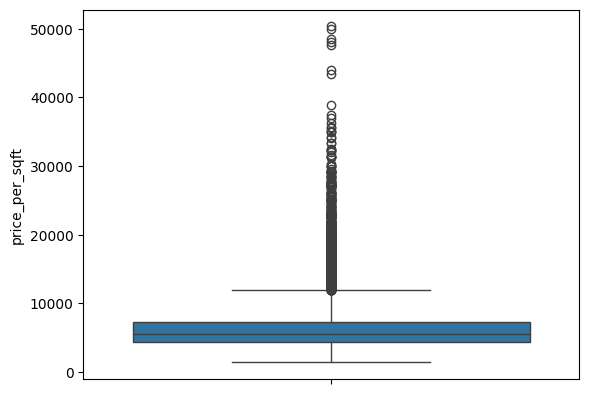

In [9]:
sns.boxplot(data=df1.price_per_sqft)
plt.show()

**Now one can notice the extreme outliers are removed from the dataset.**